In [1]:
# check the total time to run entire jupyter notebook
import timeit
start_time = timeit.default_timer()


# DSA5102 - Homework 1 (AY21/22 Semester 1)
# Lim Chen Hao (A0048820H)

Dear Dr Low,

For your information, my jupyter notebook will take around 5 minutes to complete execution because I used cross_val_score and GridSeachCV inside here. 

Thank you for your patience!

Best Regards,
Chen Hao

## Description

As the first homework of this course, you will apply the knowledge you have learned in the first lecture on `linear models` and simple extensions using `kernel` methods on some datasets. This is also a chance to learn to use `jupyter notebook` and basic `sklearn` functionalities. A basic introduction to installing and using `jupyter notebooks` is found [here](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook). You are strongly encouraged to use python 3 instead of python 2


The goals of this homework are
  * Learn basic data processing and machine learning using python
  * Reinforce knowledge on linear models and kernel methods
  * Prepare for the project in this course
  
Whenever you are stuck, you are encouraged to look at the jupyter notebook demonstration for the first lecture for some guidance. You should also learn to look at documentation of online libraries. For example, if you want to perform *kernel ridge regression* using `sklearn`, a quick google will land you on [this page](https://scikit-learn.org/stable/modules/kernel_ridge.html), where extensive description and examples are given.

## Instructions

Please complete each question below directly in this notebook. Note that you can write in the cells to describe what you are doing and any issues you face. If you are familiar, you can also format it using `markdown` as it is supported by `jupyter`. 

The grade given is based on the following
  1. Scientific correctness of your approach
  2. Clear documentation of your approach

## Dataset

We will work on a standard regression dataset on predicting concrete compressive strength from various composition and processing properties. 

We will download the dataset directly from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength) using `urllib`. Running it requires an internet connection. Otherwise, you can also download the `Concrete_Data.xls` directly from the link above and place into the root folder relative to this notebook. 

Reading the Excel file requires the `xlrd` library on top of `pandas`. If you see an error due to not having xlrd, install it via
```
$pip install xlrd
```

In general, if you see an error 
```
ModuleNotFoundError: No module named 'some_module'
```
just install it
```
$pip install some_module
```

In [2]:
import pandas as pd
import urllib.request

import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
urllib.request.urlretrieve(url, './Concrete_Data.xls')
data = pd.read_excel('./Concrete_Data.xls')

In [4]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
data.set_axis(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 
               'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Concrete_compressive_strength'], axis=1, inplace = True)
data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [6]:
# Check for missing values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

In [7]:
data.shape

(1030, 9)

## Question 1 (2 points)

In this homework we are going to predict the last column values (Concrete compressive strength) from design variables in the other columns. Choose 3 input properties and visualize each of their effects on the compressive strength. Plot your findings below. You may find the `seaborn` library examples in lecture 1 useful.

## Selecting 3 inputs to predict Concrete compressive strength

We can use seaborn pairplot to plot pairwise relationships in a dataset.\
Note: I split the data in 2 set for viewing purpose.

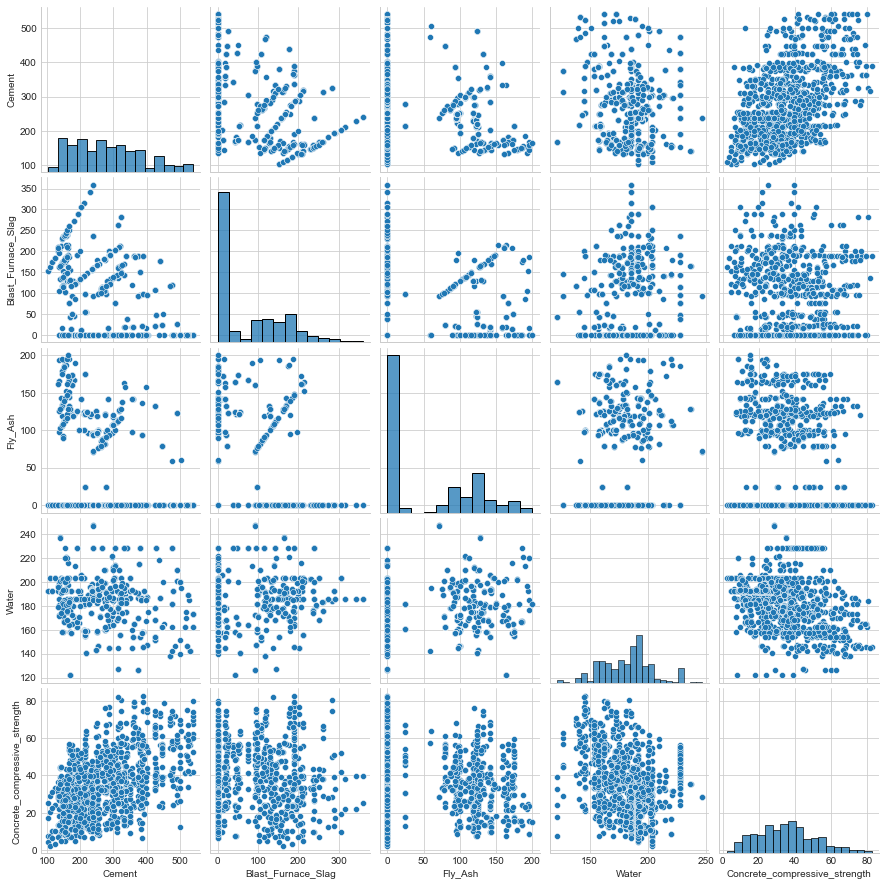

In [8]:
data_set1 = data[['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Concrete_compressive_strength']]
sns.pairplot(data_set1)

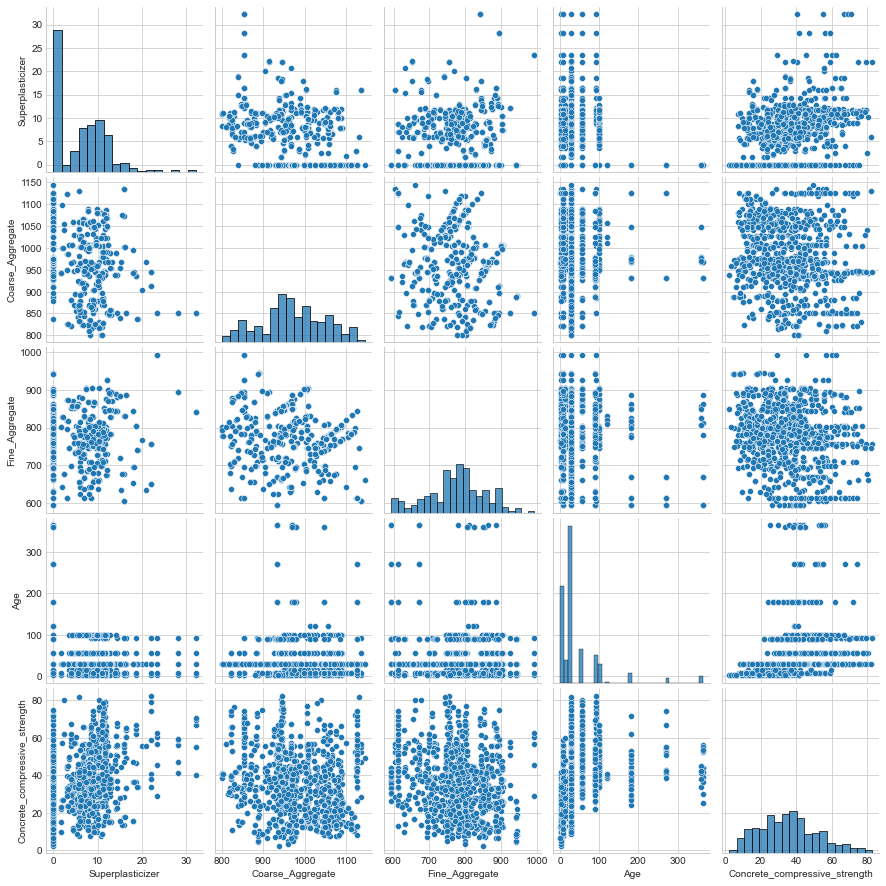

In [9]:
data_set2 = data[['Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Concrete_compressive_strength']]
sns.pairplot(data_set2)

<AxesSubplot:>

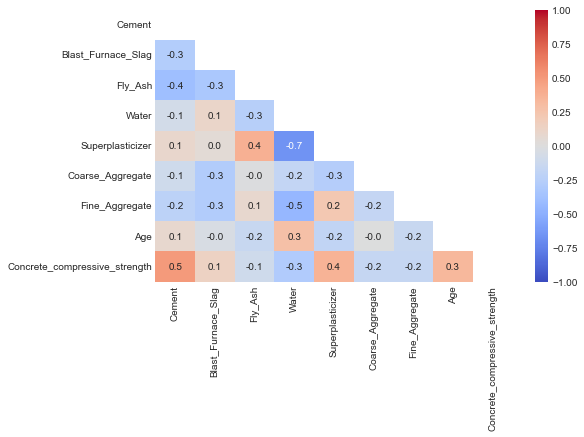

In [10]:
# Check for correlation between variables and label (Concrete compressive strength)
matrix = np.triu(data.corr())

plt.figure(figsize = (8,5))
sns.heatmap(data.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

# Solution to Question 1:

From the seaborn pairplot and heatmap, I picked the 3 variables that have the highest correlation  with the labels that we are trying to predict (Concrete compressive strength):

**3 variables choosen are:**
1. Cement
2. Superplasticizer
3. Water

## Visualization on selected variables

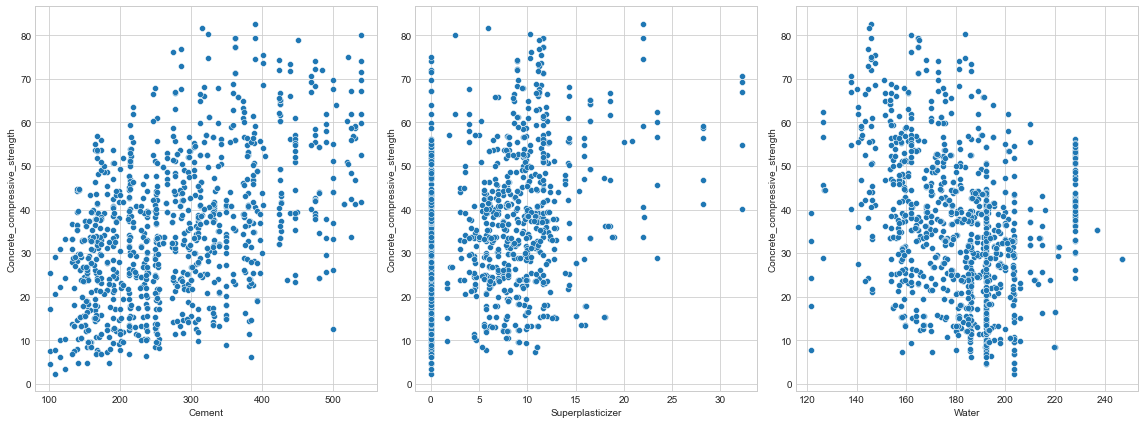

In [11]:
# Scatter plot of 3 choosen features with respect to the label we are trying to predict
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

sns.scatterplot(x='Cement', y='Concrete_compressive_strength', data=data, ci='sd', ax=ax[0])
sns.scatterplot(x='Superplasticizer', y='Concrete_compressive_strength', data=data, ci='sd', ax=ax[1])
sns.scatterplot(x='Water', y='Concrete_compressive_strength', data=data, ci='sd', ax=ax[2])

fig.tight_layout()

# for a in ax:
#     a.set_xticklabels(a.get_xticklabels(), rotation=45)

## Define functions for predicting label (Concrete compressive strength)

In [12]:
# To reshape features and labels into Train and Test sets
def xy_oneDim(feature, label):
    X_feat_train = dataset_train[feature]
    X_feat_test = dataset_test[feature]

    X_train = np.expand_dims(X_feat_train, axis=1)
    X_test = np.expand_dims(X_feat_test, axis=1)

    y_train = dataset_train[label]
    y_test = dataset_test[label]
    
    return(X_train, X_test, y_train, y_test)

In [13]:
# Linear Regression model, also for polynomial regression after fit transform
def LinReg_fit(X_train, y_train, X_test):
    regressor = LinearRegression()
    regressor.fit(
        X=X_train,
        y=y_train,
    )
    y_hat_train = regressor.predict(X_train)
    y_hat_test = regressor.predict(X_test)
    
    scores_train = cross_val_score(regressor, X_train, y_train, cv=10)
    print('Mean CV accuracy:', np.mean(scores_train))
    print('Standard Deviation CV accuracy:', np.std(scores_train))
    print('')
    print('Train accuracy:', regressor.score(X_train, y_train))
    print('Test accuracy:', regressor.score(X_test, y_test))
    print('')
    
    r2 = round(r2_score(y_hat_train, y_train),5)
    mae = round(mean_absolute_error(y_hat_train, y_train),5)
    mse = round(mean_squared_error(y_hat_train, y_train),5)
    print('r2_score: {} \nmean_absolute_error: {} \nmean_squared_error: {}\n'.format(r2, mae, mse))
    
    
    return(y_hat_train, y_hat_test)
    

In [14]:
# fit_transform for polynomial regression based on degree used
def poly_fit(X_train, X_test, n):
    phi = PolynomialFeatures(degree=n)
    X_poly_train = phi.fit_transform(X_train)
    X_poly_test = phi.fit_transform(X_test)
    
    return(X_poly_train, X_poly_test)

In [15]:
# Plot scatter plot for train and test set
def plot_train_test(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test, feature, label):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True) # sharex=True: True or 'all': x- or y-axis will be shared among all subplots.

    sns.scatterplot(x=X_train.ravel(), y=y_train, ax=ax[0], alpha=0.5) 
    sns.lineplot(x=X_train.ravel(), y=y_hat_train, ax=ax[0], color='red') 

    sns.scatterplot(x=X_test.ravel(), y=y_test, ax=ax[1], alpha=0.5)
    sns.lineplot(x=X_test.ravel(), y=y_hat_test, ax=ax[1], color='red')

    for a in ax:
        a.set_xlabel(feature)
        a.set_ylabel(label)

    ax[0].set_title('Train set')
    ax[1].set_title('Test set')
    fig.tight_layout()

In [16]:
# Plot scatter plot for true and predicted labels
def plot_true_predict(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test, feature, label):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4)) # sharex=True: True or 'all': x- or y-axis will be shared among all subplots.

    sns.scatterplot(x=y_train, y=y_hat_train, ax=ax[0], alpha=0.5)
    sns.scatterplot(x=y_test, y=y_hat_test, ax=ax[1], alpha=0.5)

    for a in ax:
        a.set_xlabel(f'{label} (true)')
        a.set_ylabel(f'{label} (predict)')
        a.plot(a.get_xlim(), a.get_ylim(), ls='--', c='k')
        

    ax[0].set_title('Train set')
    ax[1].set_title('Test set')
    fig.tight_layout()

In [17]:
# Print rmse error between true and predicted labels
def rmse_scaled(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    scale = np.sqrt(np.mean(y_true**2))
    return rmse/scale

## Split data into train, validation, and test set

In this section, we will split the data into train, validation, and test set in preparation for fitting a basic model in the next section.

In [18]:
# Set random state for consistency of results
# Training set: 80%, test set: 20%
dataset_train, dataset_test = train_test_split(data, test_size=0.2) #, random_state = 43

In [19]:
# Check dimension of split train and test sets
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_train.shape[0]+dataset_test.shape[0])

(824, 9)
(206, 9)
1030


In [20]:
feature_linreg = data[['Cement', 'Superplasticizer', 'Water']]   
label_linreg = data['Concrete_compressive_strength']

## Visualizing effects on compressive strength with each choosen variables

**3 variables choosen are:**
1. Cement
2. Superplasticizer
3. Water

### Choice 1: Cement (Linear Regression)

Running Linear Regression test for Cement feature.
Mean CV accuracy: 0.22454435188289618
Standard Deviation CV accuracy: 0.09369181479814585

Train accuracy: 0.23413865451253468
Test accuracy: 0.3000514294382286

r2_score: -2.27097 
mean_absolute_error: 11.86502 
mean_squared_error: 211.96185

Scaled RMSE: 
 0.36850064449415465 (Train)     
 0.35827374790802824 (Test)


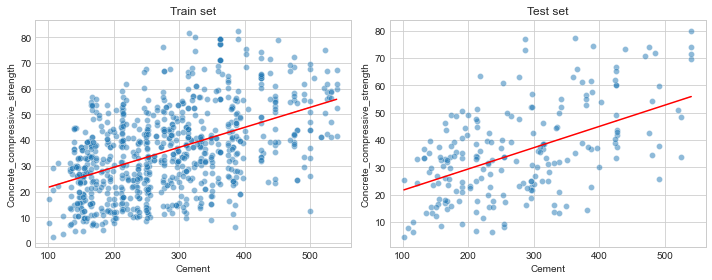

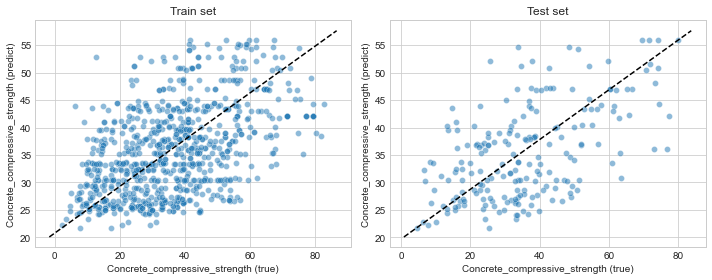

In [21]:
feature = 'Cement'
label = 'Concrete_compressive_strength'
# lin_reg_performance(feature, label)

print('Running Linear Regression test for', feature, 'feature.')
X_train, X_test, y_train, y_test = xy_oneDim(feature, label_linreg.name)
y_hat_train, y_hat_test = LinReg_fit(X_train, y_train, X_test)
plot_train_test(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test, feature, label) #_linreg.name
plot_true_predict(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test, feature, label) #_linreg.name

print(f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_test)} (Test)')



### Choice 1: Cement (Polynomial Regression)

Running Polynomial Regression test for Cement feature.
Mean CV accuracy: 0.22040802793075281
Standard Deviation CV accuracy: 0.09269149610201878

Train accuracy: 0.23505902182687732
Test accuracy: 0.29391737597834133

r2_score: -2.25425 
mean_absolute_error: 11.89146 
mean_squared_error: 211.70712

Scaled RMSE: 
 0.3682791566842422 (Train)     
 0.3598402033124311 (Test)


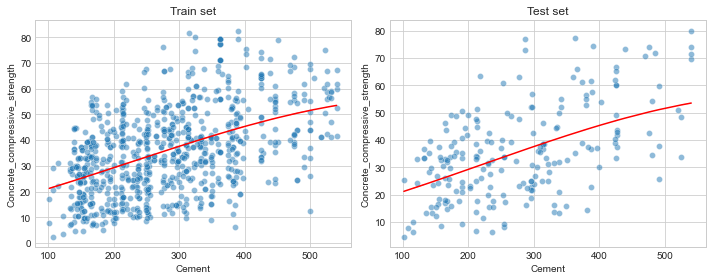

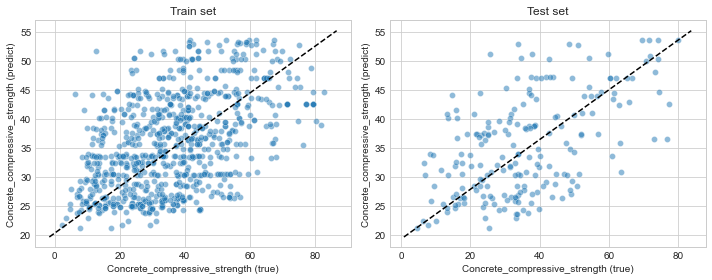

In [22]:
feature = 'Cement'
label = 'Concrete_compressive_strength'

print('Running Polynomial Regression test for', feature, 'feature.')
X_poly_train, X_poly_test = poly_fit(X_train, X_test, 3)
y_hat_poly_train, y_hat_poly_test = LinReg_fit(X_poly_train, y_train, X_poly_test)
plot_train_test(X_train, X_test, y_train, y_test, y_hat_poly_train, y_hat_poly_test, feature, label) #_linreg.name
plot_true_predict(X_train, X_test, y_train, y_test, y_hat_poly_train, y_hat_poly_test, feature, label) #_linreg.name

print(f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_poly_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_poly_test)} (Test)')

### Choice 2: Superplasticizer (Linear Regression)

Running Linear Regression test for Superplasticizer feature.
Mean CV accuracy: 0.13452112252109916
Standard Deviation CV accuracy: 0.06042153524808135

Train accuracy: 0.1450996329197446
Test accuracy: 0.09101471089388902

r2_score: -4.89182 
mean_absolute_error: 12.53682 
mean_squared_error: 236.60453

Scaled RMSE: 
 0.3893327419211504 (Train)     
 0.4082821083580437 (Test)


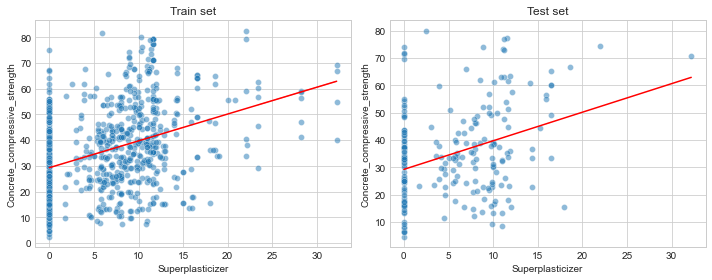

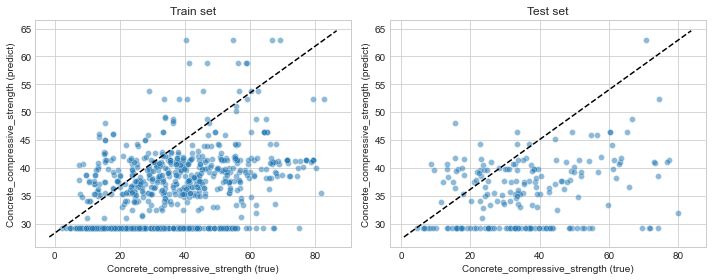

In [23]:
feature = 'Superplasticizer'
label = 'Concrete_compressive_strength'
# lin_reg_performance(feature, label)

print('Running Linear Regression test for', feature, 'feature.')
X_train, X_test, y_train, y_test = xy_oneDim(feature, label_linreg.name)
y_hat_train, y_hat_test = LinReg_fit(X_train, y_train, X_test)
plot_train_test(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test, feature, label) #_linreg.name
plot_true_predict(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test, feature, label) #_linreg.name

print(f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_test)} (Test)')

### Choice 2: Superplasticizer (Polynomial Regression)

Running Polynomial Regression test for Superplasticizer feature.
Mean CV accuracy: 0.13297552588392922
Standard Deviation CV accuracy: 0.06131819477803918

Train accuracy: 0.14731374883895665
Test accuracy: 0.08105354191613967

r2_score: -4.78823 
mean_absolute_error: 12.54307 
mean_squared_error: 235.99174

Scaled RMSE: 
 0.3888282464718761 (Train)     
 0.41051310468501884 (Test)


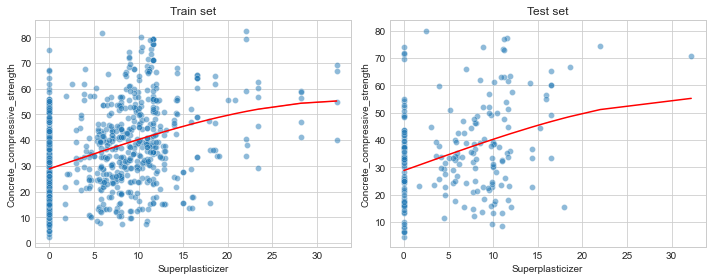

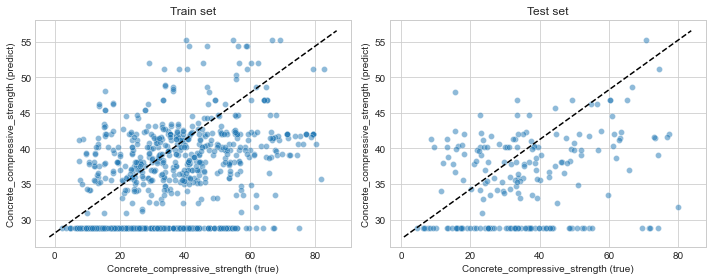

In [24]:
feature = 'Superplasticizer'
label = 'Concrete_compressive_strength'

print('Running Polynomial Regression test for', feature, 'feature.')
X_poly_train, X_poly_test = poly_fit(X_train, X_test, 3)
y_hat_poly_train, y_hat_poly_test = LinReg_fit(X_poly_train, y_train, X_poly_test)
plot_train_test(X_train, X_test, y_train, y_test, y_hat_poly_train, y_hat_poly_test, feature, label) #_linreg.name
plot_true_predict(X_train, X_test, y_train, y_test, y_hat_poly_train, y_hat_poly_test, feature, label) #_linreg.name

print(f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_poly_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_poly_test)} (Test)')

###  Choice 3: Water (Linear Regression)

Running Linear Regression test for Water feature.
Mean CV accuracy: 0.08132211129864336
Standard Deviation CV accuracy: 0.02370290457914157

Train accuracy: 0.0884722251965443
Test accuracy: 0.065932000462125

r2_score: -9.30298 
mean_absolute_error: 13.04144 
mean_squared_error: 252.27688

Scaled RMSE: 
 0.4020204355655472 (Train)     
 0.41387688170516473 (Test)


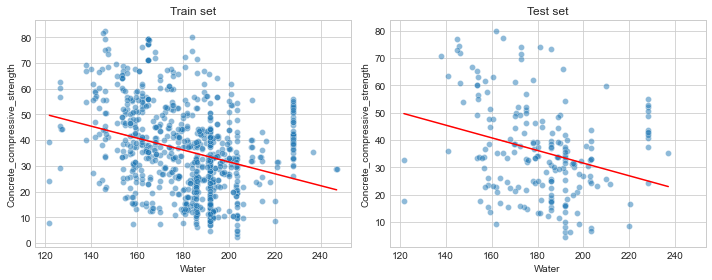

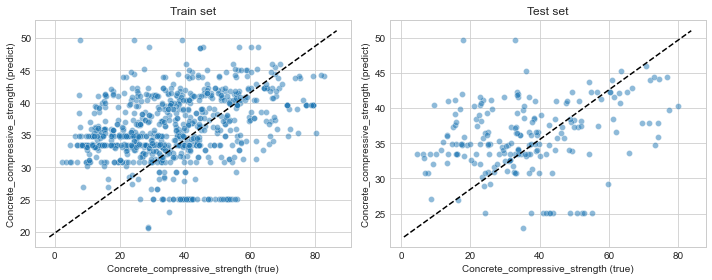

In [25]:
feature = 'Water'
label = 'Concrete_compressive_strength'
# lin_reg_performance(feature, label)

print('Running Linear Regression test for', feature, 'feature.')
X_train, X_test, y_train, y_test = xy_oneDim(feature, label_linreg.name)
y_hat_train, y_hat_test = LinReg_fit(X_train, y_train, X_test)
plot_train_test(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test, feature, label) #_linreg.name
plot_true_predict(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test, feature, label) #_linreg.name

print(f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_test)} (Test)')

### Choice 3: Water (Polynomial Regression)

Running Polynomial Regression test for Water feature.
Mean CV accuracy: 0.1674227323859204
Standard Deviation CV accuracy: 0.07014730393012883

Train accuracy: 0.17939631243683263
Test accuracy: 0.18062309638954888

r2_score: -3.57425 
mean_absolute_error: 12.19542 
mean_squared_error: 227.11249

Scaled RMSE: 
 0.3814432277226741 (Train)     
 0.38763571168434086 (Test)


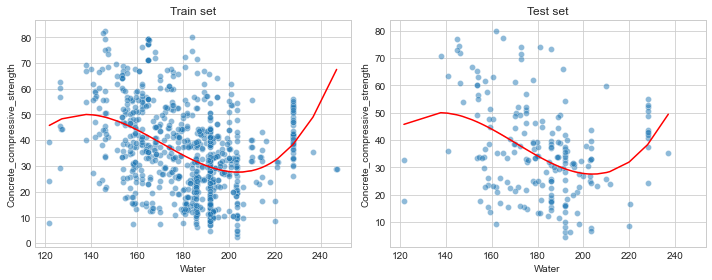

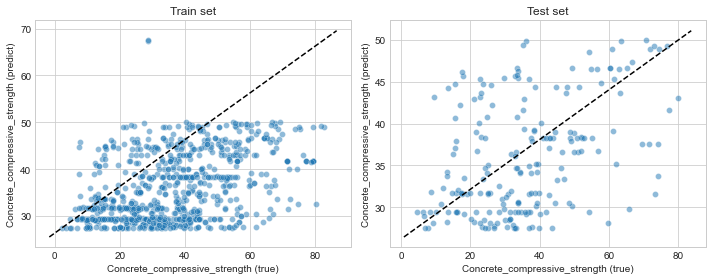

In [26]:
feature = 'Water'
label = 'Concrete_compressive_strength'

print('Running Polynomial Regression test for', feature, 'feature.')
X_poly_train, X_poly_test = poly_fit(X_train, X_test, 3)
y_hat_poly_train, y_hat_poly_test = LinReg_fit(X_poly_train, y_train, X_poly_test)
plot_train_test(X_train, X_test, y_train, y_test, y_hat_poly_train, y_hat_poly_test, feature, label) #_linreg.name
plot_true_predict(X_train, X_test, y_train, y_test, y_hat_poly_train, y_hat_poly_test, feature, label) #_linreg.name

print(f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_poly_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_poly_test)} (Test)')

# Observation for Question 1
* In general, linear regression for single feature prediction have a relatively high root-mean-squred-error (35% - 41%) for all 3 features.  
* We try by going into a larger hypothesis space to minimize squared error and maximize rsquared by using polynomial regression. It turns out that the performance when using polynomial regression (3rd degree) is almost the same as linear regression. Note that the feature 'water' is too resposive to outliers and tries too hard to fit the line to the data, which results in over-fitting. The r2 value for this polynomial model does not show ,cuh improvement from the linear model.
* We also plot the predicted values to the true values (for all 3 choosen features) which clearly shows that the accuracy is poor.

In general, We should include more than 1 feature in our model for better training and prediction since usually the output we are trying to predict depends on more than 1 condition. 


# Question 2 (4 points)

Perform linear regression **using all the input variables** on this dataset **to predict the compressive strength.** Carefully evaluate your regression model using appropriate metrics and datasets. 

To better study the viewpoint of approximation, we are also using a bigger hypothesis space to all the input variables.

This is not in the same way as a polynomial basis in one dimension. In question 1 (linear regression), we are using the hypothesis space consisting of all functions which are affine in the selected features and constant in the other dependent variables. Now, we are using the hypothesis space consisting of affine functions of all variables.

# Solution to Question 2:

## Split data into train, validation, and test set

In this section, we will split the data into train, validation, and test set in preparation for fitting a basic model in the next section.

In [27]:
features = data.drop(['Concrete_compressive_strength'], axis=1)
labels = data[['Concrete_compressive_strength']]

In [28]:
features

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [29]:
labels

,Concrete_compressive_strength
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075
...,...
1025,44.284354
1026,31.178794
1027,23.696601
1028,32.768036


In [30]:
# Training set (80%)
X_train = dataset_train[dataset_train.columns.intersection(features.columns)]
y_train = dataset_train[labels.columns].squeeze()

In [31]:
# Test set (20%)
X_test = dataset_test[dataset_train.columns.intersection(features.columns)]
y_test = dataset_test[labels.columns].squeeze()

In [32]:
X_train

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
331,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,28
107,323.70,282.8,0.00,183.80,10.30,942.7,659.90,7
217,190.34,0.0,125.18,161.85,9.88,1088.1,802.59,56
852,298.00,0.0,107.00,186.00,6.00,879.0,815.00,28
520,284.00,15.0,141.00,179.00,5.46,842.0,801.00,3
...,...,...,...,...,...,...,...,...
559,239.60,359.4,0.00,185.70,0.00,941.6,664.30,28
544,289.00,0.0,0.00,192.00,0.00,913.2,895.30,7
770,349.00,0.0,0.00,192.00,0.00,1047.0,806.00,3
962,144.80,0.0,133.60,180.80,11.10,979.5,811.50,28


In [33]:
y_train

331    52.503597
107    49.800851
217    38.562393
852    42.637196
520    13.395534
         ...    
559    39.435269
544    14.596896
770    14.989208
962    13.202086
665    11.392212
Name: Concrete_compressive_strength, Length: 824, dtype: float64

In [34]:
X_test

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
360,218.23,54.64,123.78,140.75,11.91,1075.7,792.67,14
343,297.16,0.00,117.54,174.80,9.52,1022.8,753.45,100
395,200.00,200.00,0.00,190.00,0.00,1145.0,660.00,28
272,231.75,0.00,121.62,173.96,6.72,1056.4,778.45,56
860,314.00,0.00,113.00,170.00,10.00,925.0,783.00,28
...,...,...,...,...,...,...,...,...
513,424.00,22.00,132.00,168.00,8.92,822.0,750.00,7
724,310.00,0.00,0.00,192.00,0.00,1012.0,830.00,90
756,540.00,0.00,0.00,173.00,0.00,1125.0,613.00,270
214,190.34,0.00,125.18,161.85,9.88,1088.1,802.59,3


In [35]:
y_test

360    35.956173
343    56.743875
395    49.249271
272    42.699249
860    38.458971
         ...    
513    40.285098
724    35.763120
756    74.166933
214     9.445821
442    44.636676
Name: Concrete_compressive_strength, Length: 206, dtype: float64

## Linear Regression (all features)

In [36]:
feature

'Water'

In [37]:
features

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


ALL Features Linear Regression test.
Mean CV accuracy: 0.5908156062224885
Standard Deviation CV accuracy: 0.050532102476411815

Train accuracy: 0.6063453512671906
Test accuracy: 0.6461680175574547

r2_score: 0.35077 
mean_absolute_error: 8.28761 
mean_squared_error: 108.94892

Scaled RMSE: 
 0.2641927337590562 (Train)     
 0.2547302162449273 (Test)


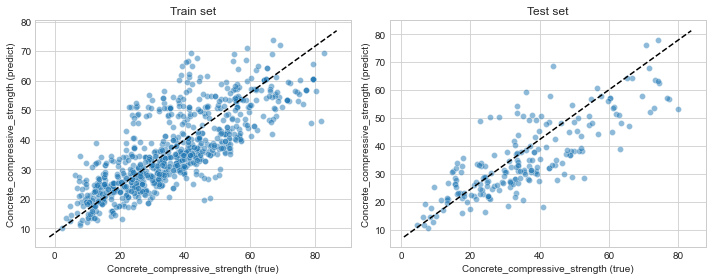

In [38]:
# y_hat_train: similar to y_train_predict -> 'hat' equvalent to 'predict'
# y_hat_test: similar to y_test_predict

print('ALL Features Linear Regression test.')
y_hat_train, y_hat_test = LinReg_fit(X_train, y_train, X_test)
plot_true_predict(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test, feature, label) #_linreg.name

print(f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_test)} (Test)')

## Polynomial Regression (all features)


ALL Features Polynomial Regression test.
Mean CV accuracy: 0.775360501129089
Standard Deviation CV accuracy: 0.21663786345062291

Train accuracy: 0.9265870866680547
Test accuracy: 0.8279851790698556

r2_score: 0.92077 
mean_absolute_error: 3.47661 
mean_squared_error: 20.31796

Scaled RMSE: 
 0.11409047968262447 (Train)     
 0.1776089534664301 (Test)


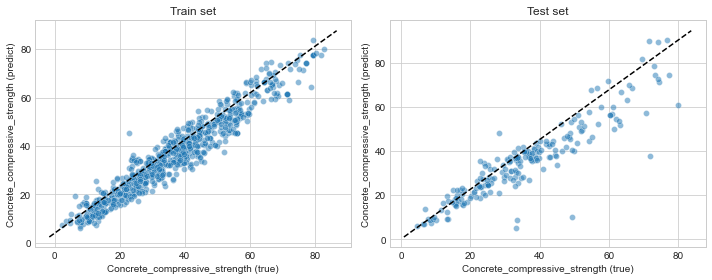

In [39]:
print('ALL Features Polynomial Regression test.')

X_poly_train, X_poly_test = poly_fit(X_train, X_test, 3)
y_hat_poly_train, y_hat_poly_test = LinReg_fit(X_poly_train, y_train, X_poly_test)
plot_true_predict(X_train, X_test, y_train, y_test, y_hat_poly_train, y_hat_poly_test, feature, label) #_linreg.name

print(f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_poly_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_poly_test)} (Test)')

# Observation for Question 2

## 1. Comparing 'all' vs single feature for linear regression

Using linear regression (all features), we see a pretty good improvement:

* Reducing the error:
    * from approximately 40% (when predicting with individual feature) 
    * to 27% (predicting using all features)\

* Improve r2 value: from negative to 0.373 

* Significantly reduced mean squred and mean absolute error:
    * mae: ~10+ to 8
    * mqe: ~200+ to 100+
    

## 2. Comparing 'all' vs single feature for polynomial regression

Using a larger hypothesis space (degree = 3) with polynomial regression (all features), we see an obvious improvement:

* Reducing the error:
    * from approximately 40% (when predicting with individual feature) 
    * to ~11% (train set)/ ~17% (test set) (predicted using all features)

* Improve r2 value: from negative to 0.923

* Significantly reduced mean squred and mean absolute error:
    * mae: ~10+ to 3.42
    * mqe: ~200+ to ~20

This is a **big improvement compared to linear regression method (all features).** 

NOTE: When use degree = 1 for polynomial regression (all features), the error is about the same as linear regression (all features). Increasing the degree of features, helps minimize squared error and maximize r2 which is an example of a linear basis model. I am using degree = 3 here.

## Question 3 (4 points)

Now, instead of linear regression, apply kernel ridge regression (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)) with 3 kernels:
1. linear kernel
2. polynomial kernel with degree 3
3. rbf kernel (Gaussian, radial basis function)

Quantify the performance improvement (if any) with respect to the linear case, and also the other kernels. What do you observe? Which would you choose?

*Hint: For the RBF kernel, should you do something to the inputs first? Why?*

---

Note: we have not gone through cross validation and hyper-parameter tuning yet, so you are not expected to do this here -- although you are free to do it if you know how. 

# Solution to Question 3:

### StandardScaler 

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

StandardScaler function removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

The reason why we need to scale our features before using it for RBF kernel (Gaussian) is because the method of computing is by taking the squared of the distance between actual and predicted values:
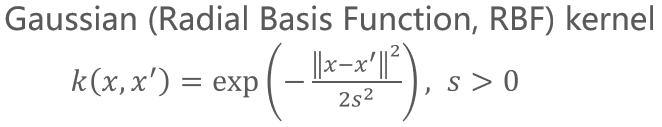
Hence, if we do not scale all features to comparable ranges, the features with the largest range will completely dominate in the computation of the kernel matrix.

For example, if the feature x1 ranges from (0 - 10,000) and feature x2 ranges from (0 - 0.01), we can expect x1 is going to dominate while x2 will have virtually no impact. For this reason it is necessary to scale the features before applying the kernal. 

**I have showed an example below to demonstrate the impact of the regression results WITH and WITHOUT feature scaling for the RBF Kernel.**

In [40]:
features = data.drop(['Concrete_compressive_strength'], axis=1)
labels = data[['Concrete_compressive_strength']]

In [41]:
# # Training set (80%)
# X_train = dataset_train[dataset_train.columns.intersection(features.columns)]
# y_train = dataset_train[labels.columns].squeeze()

# # Test set (20%)
# X_test = dataset_test[dataset_train.columns.intersection(features.columns)]
# y_test = dataset_test[labels.columns].squeeze()

In [42]:
# Standarize all features 
scaler = StandardScaler()
features = data.drop(['Concrete_compressive_strength'], axis=1)
labels = data[['Concrete_compressive_strength']]

features_scale = scaler.fit_transform(features)
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Create function for KernelRidge() Regression

For Linear, Polynomial and RBF kernal.

In [43]:
# Function for KernelRidge Regression

def universal_KernelRidge(X_train, y_train, X_test, y_test, alpha, kernel, cv, degree, gamma):
    
    uni_Kernel = KernelRidge(alpha=alpha, kernel=kernel, degree = degree, gamma=gamma)
    
    uni_Kernel.fit(
        X=X_train,
        y=y_train,
    )

    y_hat_train = uni_Kernel.predict(X_train)
    y_hat_test = uni_Kernel.predict(X_test)

    y_train_pred = cross_val_predict(uni_Kernel, X_train, y_train, cv=cv) 
    y_test_pred = cross_val_predict(uni_Kernel, X_test, y_test, cv=cv)
        
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.scatterplot(y_train, y_train_pred, edgecolors=(0, 0, 0), ax=ax[0], alpha=0.5)
    sns.scatterplot(y_test, y_test_pred, edgecolors=(0, 0, 0), ax=ax[1], alpha=0.5)
    
    for a in ax:
        a.set_xlabel('Measured')
        a.set_ylabel('Predicted')

    ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
    ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax[0].set_title('Train set')
    ax[1].set_title('Test set')
    fig.tight_layout()
    
    scores_train = cross_val_score(uni_Kernel, X_train, y_train, cv=cv)
    print('Mean CV accuracy:', np.mean(scores_train))
    print('Standard Deviation CV accuracy:', np.std(scores_train))
    print('')
    fig, ax = plt.subplots()
    sns.distplot(scores_train, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 2, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "g"})
    scores_train
    ax.set_xlabel('Score')
    ax.set_ylabel('Density')
    ax.set_title('PDF for Cross Validation Score')
    
    
    print('Train accuracy:', uni_Kernel.score(X_train, y_train))
    print('Test accuracy:', uni_Kernel.score(X_test, y_test))
    print('')
    
    print(uni_Kernel.get_params())
    print('')
    r2 = round(r2_score(y_hat_train, y_train),5)
    mae = round(mean_absolute_error(y_hat_train, y_train),5)
    mse = round(mean_squared_error(y_hat_train, y_train),5)
    print('r2_score: {} \nmean_absolute_error: {} \nmean_squared_error: {}\n'.format(r2, mae, mse))

    print(f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_test)} (Test)')

    

## Function to print best hyperparameter found

In [44]:
# Function to seach for Hyperparamaters using GridSearchCV for model optimization 

def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()
    
    means = gd_model.cv_results_['mean_test_score']
    stds = gd_model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gd_model.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 7), round(std * 2, 3), params))
    
    print('\nBEST PARAMS: {}\n'.format(gd_model.best_params_))
    
    return param_dict

## 1a. Linear KernelRidge() Regression (no regularization strength: alpha = 0)

In [45]:
X_train

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
331,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,28
107,323.70,282.8,0.00,183.80,10.30,942.7,659.90,7
217,190.34,0.0,125.18,161.85,9.88,1088.1,802.59,56
852,298.00,0.0,107.00,186.00,6.00,879.0,815.00,28
520,284.00,15.0,141.00,179.00,5.46,842.0,801.00,3
...,...,...,...,...,...,...,...,...
559,239.60,359.4,0.00,185.70,0.00,941.6,664.30,28
544,289.00,0.0,0.00,192.00,0.00,913.2,895.30,7
770,349.00,0.0,0.00,192.00,0.00,1047.0,806.00,3
962,144.80,0.0,133.60,180.80,11.10,979.5,811.50,28


In [46]:
y_train

331    52.503597
107    49.800851
217    38.562393
852    42.637196
520    13.395534
         ...    
559    39.435269
544    14.596896
770    14.989208
962    13.202086
665    11.392212
Name: Concrete_compressive_strength, Length: 824, dtype: float64

In [47]:
X_test

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
360,218.23,54.64,123.78,140.75,11.91,1075.7,792.67,14
343,297.16,0.00,117.54,174.80,9.52,1022.8,753.45,100
395,200.00,200.00,0.00,190.00,0.00,1145.0,660.00,28
272,231.75,0.00,121.62,173.96,6.72,1056.4,778.45,56
860,314.00,0.00,113.00,170.00,10.00,925.0,783.00,28
...,...,...,...,...,...,...,...,...
513,424.00,22.00,132.00,168.00,8.92,822.0,750.00,7
724,310.00,0.00,0.00,192.00,0.00,1012.0,830.00,90
756,540.00,0.00,0.00,173.00,0.00,1125.0,613.00,270
214,190.34,0.00,125.18,161.85,9.88,1088.1,802.59,3


In [48]:
y_test

360    35.956173
343    56.743875
395    49.249271
272    42.699249
860    38.458971
         ...    
513    40.285098
724    35.763120
756    74.166933
214     9.445821
442    44.636676
Name: Concrete_compressive_strength, Length: 206, dtype: float64

Mean CV accuracy: 0.5908205972526618
Standard Deviation CV accuracy: 0.05200786183166808

Train accuracy: 0.6059915634145185
Test accuracy: 0.6450533702729133

{'alpha': 1e-20, 'coef0': 1, 'degree': 3, 'gamma': 'None', 'kernel': 'linear', 'kernel_params': None}

r2_score: 0.34603 
mean_absolute_error: 8.30981 
mean_squared_error: 109.04684

Scaled RMSE: 
 0.26431142559861504 (Train)     
 0.25513112839501423 (Test)


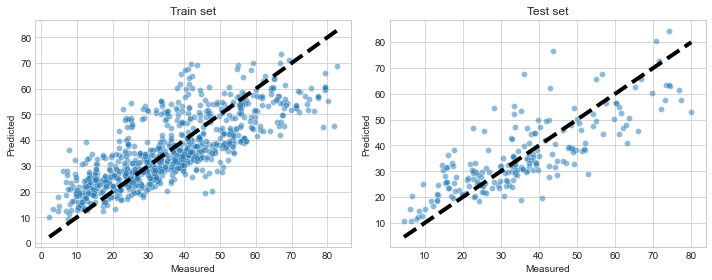

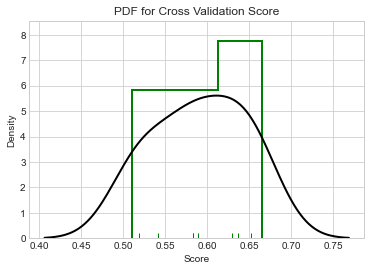

In [49]:
# Test condition with almost no regularization strength: alpha = 0
# this will results in slightly poorer accuracy and large RMSE comapred to one with some value of regularization

universal_KernelRidge(X_train, y_train, X_test, y_test, alpha = 1e-20, kernel= 'linear', cv = 10, degree= 3, gamma= 'None')

## 1b. Linear KernelRidge() Regression (with regularization strength: alpha = 1)

Mean CV accuracy: 0.5918349241313934
Standard Deviation CV accuracy: 0.05017506879911947

Train accuracy: 0.6060913114746127
Test accuracy: 0.6458539435155619

{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma': 'None', 'kernel': 'linear', 'kernel_params': None}

r2_score: 0.3492 
mean_absolute_error: 8.30218 
mean_squared_error: 109.01923

Scaled RMSE: 
 0.2642779666439906 (Train)     
 0.2548432450365709 (Test)


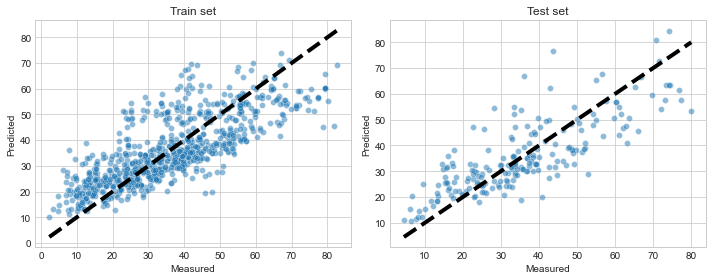

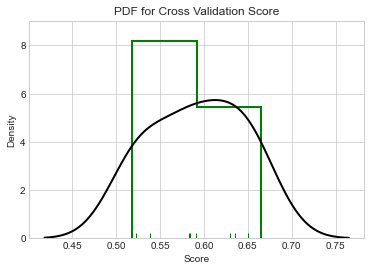

In [50]:
# Test condition with regularization strength: alpha = 1
# Results will improve slightly compare to no regularization: accuracy and RMSE

universal_KernelRidge(X_train, y_train, X_test, y_test, alpha = 1, kernel= 'linear', cv = 10, degree= 3, gamma= 'None')

## 1c. Hyperparamaters Tuning using GridSearchCV: KernelRidge() = Linear 

In [51]:
# Tuning for polynomial kernel
# Limits chosen for degree, alpha and gamma are selected after a few trial runs 
# alpha = np.arange(0.001, 0.012 ,0.001)

param_grid_kernelridge = dict(kernel = ['linear'], 
                              alpha = [0.0001, 0.001, 0.01 ,0.1, 10, 100, 1000, 2000, 3000, 
                                       4000, 5000, 6000, 7000, 8000, 9000, 10000],
                              gamma = ['None'])
                 
kernelridge = GridSearchCV(KernelRidge(), param_grid=param_grid_kernelridge, cv=10,  verbose=3)

#fit model
kernelridge = kernelridge.fit(X_train,y_train.values.ravel())

#print score
print('\n\nRegressor train score %.3f\nRegressor test score: %.3f' % (
    kernelridge.score(X_train,y_train), kernelridge.score(X_test, y_test)))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.665 total time=   0.0s
[CV 2/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.519 total time=   0.0s
[CV 3/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.651 total time=   0.0s
[CV 4/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.635 total time=   0.0s
[CV 5/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.591 total time=   0.0s
[CV 6/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.539 total time=   0.0s
[CV 7/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.584 total time=   0.0s
[CV 8/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.523 total time=   0.0s
[CV 9/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.630 total time=   0.0s
[CV 10/10] END alpha=0.0001, gamma=None, kernel=linear;, score=0.583 total time=   0.0s
[CV 1/10] END alpha=0.001, gamma=None, kernel=linear;, score=0.665

[CV 3/10] END alpha=5000, gamma=None, kernel=linear;, score=0.649 total time=   0.0s
[CV 4/10] END alpha=5000, gamma=None, kernel=linear;, score=0.638 total time=   0.0s
[CV 5/10] END alpha=5000, gamma=None, kernel=linear;, score=0.591 total time=   0.0s
[CV 6/10] END alpha=5000, gamma=None, kernel=linear;, score=0.540 total time=   0.0s
[CV 7/10] END alpha=5000, gamma=None, kernel=linear;, score=0.590 total time=   0.0s
[CV 8/10] END alpha=5000, gamma=None, kernel=linear;, score=0.522 total time=   0.0s
[CV 9/10] END alpha=5000, gamma=None, kernel=linear;, score=0.627 total time=   0.0s
[CV 10/10] END alpha=5000, gamma=None, kernel=linear;, score=0.581 total time=   0.0s
[CV 1/10] END alpha=6000, gamma=None, kernel=linear;, score=0.663 total time=   0.0s
[CV 2/10] END alpha=6000, gamma=None, kernel=linear;, score=0.522 total time=   0.0s
[CV 3/10] END alpha=6000, gamma=None, kernel=linear;, score=0.649 total time=   0.0s
[CV 4/10] END alpha=6000, gamma=None, kernel=linear;, score=0.63

In [52]:
param_dict = print_best_params(kernelridge)


*** KernelRidge Best Parameters ***
alpha: 8000
coef0: 1
degree: 3
gamma: None
kernel: linear
kernel_params: None

0.5918317 (+/-0.1) for {'alpha': 0.0001, 'gamma': 'None', 'kernel': 'linear'}
0.5918351 (+/-0.1) for {'alpha': 0.001, 'gamma': 'None', 'kernel': 'linear'}
0.5918348 (+/-0.1) for {'alpha': 0.01, 'gamma': 'None', 'kernel': 'linear'}
0.5918347 (+/-0.1) for {'alpha': 0.1, 'gamma': 'None', 'kernel': 'linear'}
0.591837 (+/-0.1) for {'alpha': 10, 'gamma': 'None', 'kernel': 'linear'}
0.5918568 (+/-0.1) for {'alpha': 100, 'gamma': 'None', 'kernel': 'linear'}
0.5920198 (+/-0.1) for {'alpha': 1000, 'gamma': 'None', 'kernel': 'linear'}
0.5921431 (+/-0.099) for {'alpha': 2000, 'gamma': 'None', 'kernel': 'linear'}
0.5922254 (+/-0.099) for {'alpha': 3000, 'gamma': 'None', 'kernel': 'linear'}
0.5922799 (+/-0.099) for {'alpha': 4000, 'gamma': 'None', 'kernel': 'linear'}
0.5923149 (+/-0.099) for {'alpha': 5000, 'gamma': 'None', 'kernel': 'linear'}
0.5923358 (+/-0.099) for {'alpha': 6000, '

Kernel: linear
Best alpha: 8000
Best gamma: None
Best degree: 3

Mean CV accuracy: 0.5923494817142766
Standard Deviation CV accuracy: 0.049172704390675524

Train accuracy: 0.6057127894966763
Test accuracy: 0.6438284654365876

{'alpha': 8000, 'coef0': 1, 'degree': 3, 'gamma': 'None', 'kernel': 'linear', 'kernel_params': None}

r2_score: 0.34053 
mean_absolute_error: 8.29595 
mean_squared_error: 109.12399

Scaled RMSE: 
 0.26440491357514473 (Train)     
 0.2555709722693895 (Test)


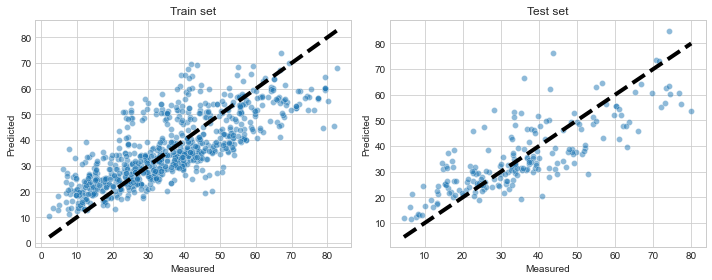

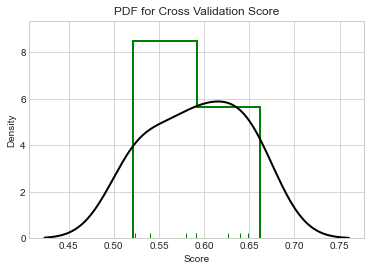

In [53]:
best_alpha = param_dict['alpha']
best_degree = param_dict['degree']
best_gamma = param_dict['gamma']
best_kernel = param_dict['kernel']

print('Kernel:', best_kernel)
print('Best alpha:', best_alpha)
print('Best gamma:', best_gamma)
print('Best degree:', best_degree)
print('')

# Pass in the best parameter to run Polynomial kernel
universal_KernelRidge(X_train, y_train, X_test, y_test, alpha = best_alpha, kernel= best_kernel, cv = 10 , degree= best_degree, gamma= best_gamma)

## 2a. Polynomial KernelRidge() Regression 
## (degree of the polynomial too high (overfitting) : degree = 4)

Observe that the accuracy for Train set is very high (<90%) but it can failed to generalize to the test set, accuracy for test set is very poor at times due to overfitting. However, sometimes results for test set perform very well depending on how the data is being split.

Mean CV accuracy: 0.31372693204206487
Standard Deviation CV accuracy: 0.6225014443334614

Train accuracy: 0.9651154818960735
Test accuracy: 0.46424702801345363

{'alpha': 1, 'coef0': 1, 'degree': 4, 'gamma': 1, 'kernel': 'polynomial', 'kernel_params': None}

r2_score: 0.96396 
mean_absolute_error: 2.24803 
mean_squared_error: 9.65473

Scaled RMSE: 
 0.07864652545287343 (Train)     
 0.31344707095451885 (Test)


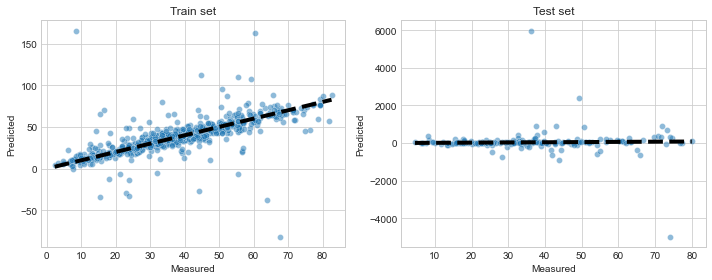

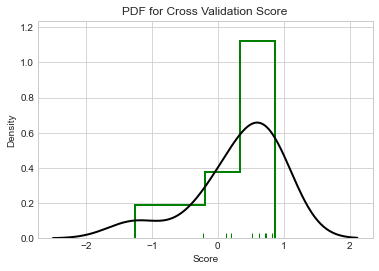

In [54]:
# Test condition with degree of the polynomial too high (overfitting) : degree = 4 (or 5)

universal_KernelRidge(X_train, y_train, X_test, y_test, alpha = 1, kernel= 'polynomial', cv = 10, degree= 4, gamma= 1)

## 2b. Polynomial KernelRidge() Regression 
## (degree of the polynomial 'just nice' : degree = 3)

A significant inprovement in terms of accuracy for both train and test set.

Mean CV accuracy: 0.8491588071228225
Standard Deviation CV accuracy: 0.021721541738492788

Train accuracy: 0.9155418515059061
Test accuracy: 0.8834345000943364

{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma': 1, 'kernel': 'polynomial', 'kernel_params': None}

r2_score: 0.90824 
mean_absolute_error: 3.74909 
mean_squared_error: 23.37486

Scaled RMSE: 
 0.12237253446351873 (Train)     
 0.14620658616092688 (Test)


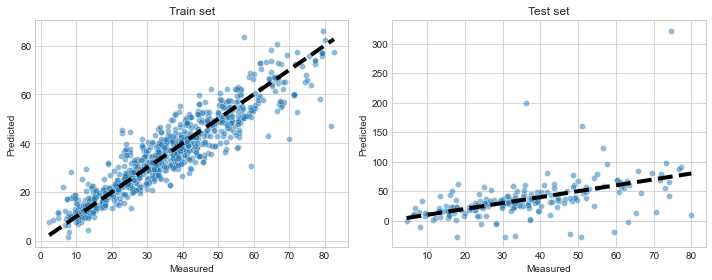

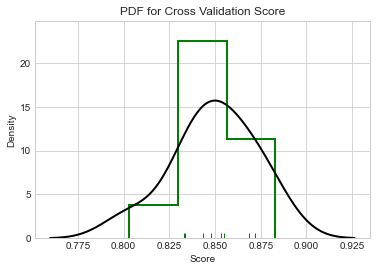

In [55]:
# Test condition with degree of the polynomial 'just nice' : degree= 3

universal_KernelRidge(X_train, y_train, X_test, y_test, alpha = 1, kernel= 'polynomial', cv = 10, degree= 3, gamma= 1)

## 2c. Hyperparamaters Tuning using GridSearchCV: KernelRidge() = Polynomial 

In [56]:
# Tuning for polynomial kernel
# Limits chosen for degree, alpha and gamma are selected after a few trial runs 
# alpha = np.arange(0.001, 0.005, 0.002)
# gamma = np.arange(0.02, 0.08, 0.02)
# degree = np.arange(3,5,1)
param_grid_kernelridge = dict(kernel = ['polynomial'], 
                              alpha = [0.0001],
                              gamma = [0.4, 0.6, 0.8, 1],
                              degree = [2, 3, 4])
                 
kernelridge = GridSearchCV(KernelRidge(), param_grid=param_grid_kernelridge, cv=10,  verbose=3)

#fit model
kernelridge = kernelridge.fit(X_train,y_train.values.ravel())

#print score
print('\n\nRegressor train score %.3f\nRegressor test score: %.3f' % (
    kernelridge.score(X_train,y_train), kernelridge.score(X_test, y_test)))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END alpha=0.0001, degree=2, gamma=0.4, kernel=polynomial;, score=0.785 total time=   0.0s
[CV 2/10] END alpha=0.0001, degree=2, gamma=0.4, kernel=polynomial;, score=0.663 total time=   0.0s
[CV 3/10] END alpha=0.0001, degree=2, gamma=0.4, kernel=polynomial;, score=0.770 total time=   0.0s
[CV 4/10] END alpha=0.0001, degree=2, gamma=0.4, kernel=polynomial;, score=0.755 total time=   0.0s
[CV 5/10] END alpha=0.0001, degree=2, gamma=0.4, kernel=polynomial;, score=0.770 total time=   0.0s
[CV 6/10] END alpha=0.0001, degree=2, gamma=0.4, kernel=polynomial;, score=0.749 total time=   0.0s
[CV 7/10] END alpha=0.0001, degree=2, gamma=0.4, kernel=polynomial;, score=0.758 total time=   0.0s
[CV 8/10] END alpha=0.0001, degree=2, gamma=0.4, kernel=polynomial;, score=0.748 total time=   0.0s
[CV 9/10] END alpha=0.0001, degree=2, gamma=0.4, kernel=polynomial;, score=0.782 total time=   0.0s
[CV 10/10] END alpha=0.0001, degree=2

[CV 5/10] END alpha=0.0001, degree=4, gamma=0.4, kernel=polynomial;, score=0.798 total time=   0.0s
[CV 6/10] END alpha=0.0001, degree=4, gamma=0.4, kernel=polynomial;, score=0.798 total time=   0.0s
[CV 7/10] END alpha=0.0001, degree=4, gamma=0.4, kernel=polynomial;, score=0.849 total time=   0.0s
[CV 8/10] END alpha=0.0001, degree=4, gamma=0.4, kernel=polynomial;, score=0.681 total time=   0.0s
[CV 9/10] END alpha=0.0001, degree=4, gamma=0.4, kernel=polynomial;, score=0.514 total time=   0.0s
[CV 10/10] END alpha=0.0001, degree=4, gamma=0.4, kernel=polynomial;, score=-0.375 total time=   0.0s
[CV 1/10] END alpha=0.0001, degree=4, gamma=0.6, kernel=polynomial;, score=0.558 total time=   0.0s
[CV 2/10] END alpha=0.0001, degree=4, gamma=0.6, kernel=polynomial;, score=-1.114 total time=   0.0s
[CV 3/10] END alpha=0.0001, degree=4, gamma=0.6, kernel=polynomial;, score=-1.097 total time=   0.0s
[CV 4/10] END alpha=0.0001, degree=4, gamma=0.6, kernel=polynomial;, score=-0.867 total time=   

In [57]:
param_dict = print_best_params(kernelridge)


*** KernelRidge Best Parameters ***
alpha: 0.0001
coef0: 1
degree: 3
gamma: 0.4
kernel: polynomial
kernel_params: None

0.7555607 (+/-0.067) for {'alpha': 0.0001, 'degree': 2, 'gamma': 0.4, 'kernel': 'polynomial'}
0.7684873 (+/-0.037) for {'alpha': 0.0001, 'degree': 2, 'gamma': 0.6, 'kernel': 'polynomial'}
0.7683352 (+/-0.05) for {'alpha': 0.0001, 'degree': 2, 'gamma': 0.8, 'kernel': 'polynomial'}
0.7697205 (+/-0.05) for {'alpha': 0.0001, 'degree': 2, 'gamma': 1, 'kernel': 'polynomial'}
0.8530417 (+/-0.039) for {'alpha': 0.0001, 'degree': 3, 'gamma': 0.4, 'kernel': 'polynomial'}
0.8489679 (+/-0.047) for {'alpha': 0.0001, 'degree': 3, 'gamma': 0.6, 'kernel': 'polynomial'}
0.8483487 (+/-0.041) for {'alpha': 0.0001, 'degree': 3, 'gamma': 0.8, 'kernel': 'polynomial'}
0.8491588 (+/-0.043) for {'alpha': 0.0001, 'degree': 3, 'gamma': 1, 'kernel': 'polynomial'}
0.1358508 (+/-1.56) for {'alpha': 0.0001, 'degree': 4, 'gamma': 0.4, 'kernel': 'polynomial'}
0.1219637 (+/-1.56) for {'alpha': 0.0001

Kernel: polynomial
Best alpha: 0.0001
Best gamma: 0.4
Best degree: 3

Mean CV accuracy: 0.8530416944263074
Standard Deviation CV accuracy: 0.01970327944132258

Train accuracy: 0.9177113632514564
Test accuracy: 0.8769168594388965

{'alpha': 0.0001, 'coef0': 1, 'degree': 3, 'gamma': 0.4, 'kernel': 'polynomial', 'kernel_params': None}

r2_score: 0.91091 
mean_absolute_error: 3.71254 
mean_squared_error: 22.77442

Scaled RMSE: 
 0.12079059216007909 (Train)     
 0.1502384886104124 (Test)


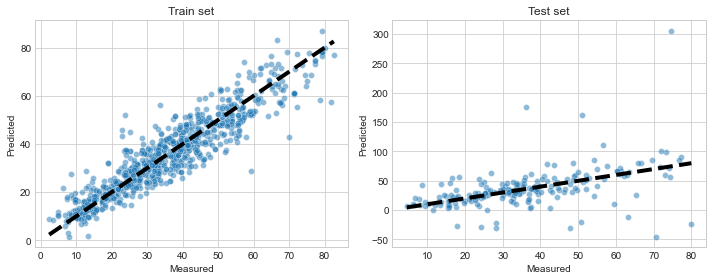

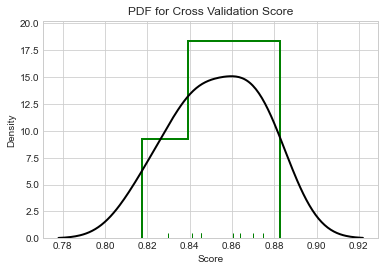

In [58]:
best_alpha = param_dict['alpha']
best_degree = param_dict['degree']
best_gamma = param_dict['gamma']
best_kernel = param_dict['kernel']

print('Kernel:', best_kernel)
print('Best alpha:', best_alpha)
print('Best gamma:', best_gamma)
print('Best degree:', best_degree)
print('')

# Pass in the best parameter to run Polynomial kernel
universal_KernelRidge(X_train, y_train, X_test, y_test, alpha = best_alpha, kernel= best_kernel, cv = 10 , degree= best_degree, gamma= best_gamma)

## 3a. Radial Basis Function (RBF) KernelRidge() Regression - < Without feature scaling >

See that when features are not scale all to comparable ranges, the features with the largest range will completely dominate in the computation of the kernel matrix.

Mean CV accuracy: -3.712691129663029
Standard Deviation CV accuracy: 0.6853214480595583

Train accuracy: -0.19733133485254983
Test accuracy: -3.733459628015308

{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'kernel_params': None}

r2_score: -2.26727 
mean_absolute_error: 16.39887 
mean_squared_error: 331.37664

Scaled RMSE: 
 0.46075531189953844 (Train)     
 0.9316896266158082 (Test)


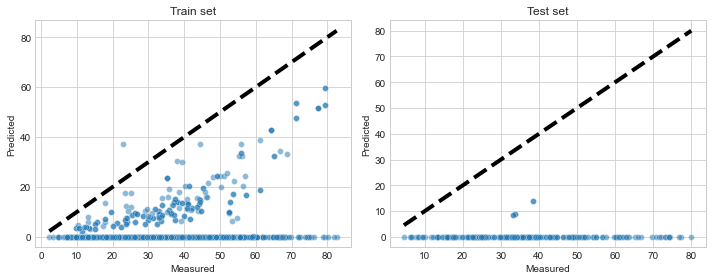

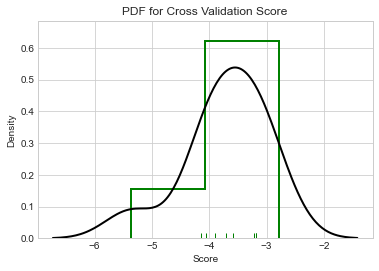

In [59]:
# Run RBF kernel without feature scaling
universal_KernelRidge(X_train, y_train, X_test, y_test, alpha = 1, kernel= 'rbf', cv = 10, degree= 3, gamma= 1)

## 3b. Radial Basis Function (RBF) KernelRidge() Regression - < With feature scaling > - High gamma

Althought Train and Test accuarcy increase significantly, the **mean score of the cross validation set is very low and standard deviation is too high.** Therefore, accuracy results cannot be trusted. We need a lower gamma in order to get a good cross-validation score.

Mean CV accuracy: 0.34566116629106153
Standard Deviation CV accuracy: 0.2092364853848739

Train accuracy: 0.7670260641692207
Test accuracy: 0.3053318344087851

{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma': 0.8, 'kernel': 'rbf', 'kernel_params': None}

r2_score: 0.60566 
mean_absolute_error: 5.89277 
mean_squared_error: 64.47849

Scaled RMSE: 
 0.20324358410963964 (Train)     
 0.35691978272491515 (Test)


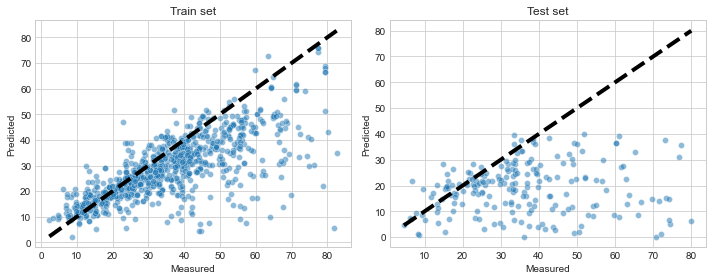

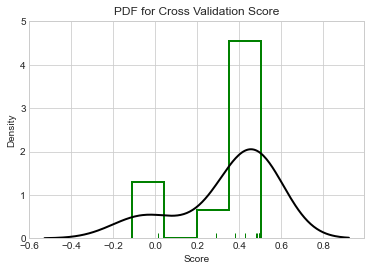

In [60]:
# Run RBF kernel with feature scaling
# High gamma: More curvature, only near points are considered, data points that are further away are neglected
# Train accuarcy is (70% ~ 80%) but Test accuracy perform can falls in range (10 ~ 80%) depends on how the data was split (randomly). 

universal_KernelRidge(X_train_scale, y_train, X_test_scale, y_test, alpha = 1, kernel= 'rbf', cv = 10, degree= 3, gamma= 0.8)

## 3c. Radial Basis Function (RBF) KernelRidge() Regression - < With feature scaling > - Low gamma

We see a significant improvement on the cross validation scores when gamma is set lower.

Mean CV accuracy: 0.8013435258688217
Standard Deviation CV accuracy: 0.03322549578050883

Train accuracy: 0.8452460550792087
Test accuracy: 0.8216349662872942

{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'kernel_params': None}

r2_score: 0.78335 
mean_absolute_error: 5.00698 
mean_squared_error: 42.83012

Scaled RMSE: 
 0.16564717775487212 (Train)     
 0.18085760755835076 (Test)


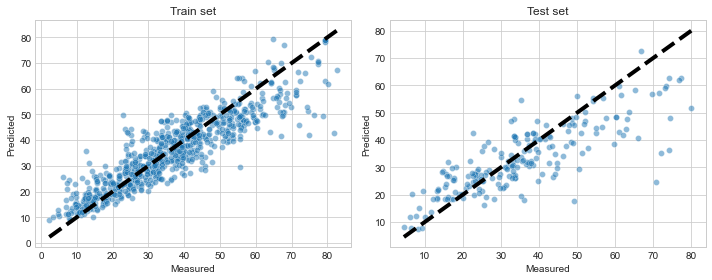

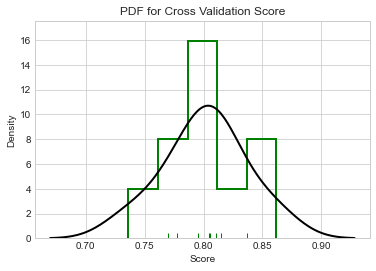

In [61]:
# Run RBF kernel with feature scaling
# Low gamma: Less curvature, far away points are also considered hence more data points for better fitting
# Both Train and Test set have around 80% (+/- 10%) accuracy (depending on the how the data was split randomly)

universal_KernelRidge(X_train_scale, y_train, X_test_scale, y_test, alpha = 1, kernel= 'rbf', cv = 10, degree= 3, gamma= 0.1)

## 3d. Hyperparamaters Tuning using GridSearchCV: KernelRidge() = RBF

In [62]:
# Tuning for RBF kernel
# Limits chosen for alpha and gamma are selected after a few trial runs 
# alpha = np.arange(0.001, 0.005, 0.002),
# gamma = np.arange(0.02, 0.1, 0.02)

param_grid_kernelridge = dict(kernel = ['rbf'], 
                              alpha = [0.001, 0.01, 0.1, 1],
                              gamma = [0.02, 0.04, 0.06, 0.08, 0.1])

kernelridge = GridSearchCV(KernelRidge(), param_grid=param_grid_kernelridge, cv=10,  verbose=3)

#fit model
kernelridge = kernelridge.fit(X_train_scale,y_train.values.ravel())

#print score
print('\n\nRegressor train score %.3f\nRegressor test score: %.3f' % (
    kernelridge.score(X_train_scale,y_train), kernelridge.score(X_test_scale, y_test)))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.909 total time=   0.0s
[CV 2/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.830 total time=   0.0s
[CV 3/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.892 total time=   0.0s
[CV 4/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.870 total time=   0.0s
[CV 5/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.905 total time=   0.0s
[CV 6/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.880 total time=   0.0s
[CV 7/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.899 total time=   0.0s
[CV 8/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.866 total time=   0.0s
[CV 9/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.898 total time=   0.0s
[CV 10/10] END alpha=0.001, gamma=0.02, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/10] END alpha=0.001, gamma=0.04, kernel=rbf;, score=0.919 total time=   0.0s
[CV 2/10] END alpha=0.0

[CV 1/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.830 total time=   0.0s
[CV 2/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.824 total time=   0.0s
[CV 4/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.811 total time=   0.0s
[CV 5/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.802 total time=   0.0s
[CV 6/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.774 total time=   0.0s
[CV 7/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.815 total time=   0.0s
[CV 8/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.816 total time=   0.0s
[CV 9/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.853 total time=   0.0s
[CV 10/10] END alpha=0.1, gamma=0.02, kernel=rbf;, score=0.787 total time=   0.0s
[CV 1/10] END alpha=0.1, gamma=0.04, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/10] END alpha=0.1, gamma=0.04, kernel=rbf;, score=0.775 total time=   0.0s
[CV 3/10] END alpha=0.1, ga

In [63]:
param_dict = print_best_params(kernelridge)


*** KernelRidge Best Parameters ***
alpha: 0.001
coef0: 1
degree: 3
gamma: 0.04
kernel: rbf
kernel_params: None

0.8835918 (+/-0.045) for {'alpha': 0.001, 'gamma': 0.02, 'kernel': 'rbf'}
0.8938872 (+/-0.045) for {'alpha': 0.001, 'gamma': 0.04, 'kernel': 'rbf'}
0.8916648 (+/-0.051) for {'alpha': 0.001, 'gamma': 0.06, 'kernel': 'rbf'}
0.8865783 (+/-0.063) for {'alpha': 0.001, 'gamma': 0.08, 'kernel': 'rbf'}
0.8815323 (+/-0.074) for {'alpha': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.853459 (+/-0.054) for {'alpha': 0.01, 'gamma': 0.02, 'kernel': 'rbf'}
0.8794771 (+/-0.047) for {'alpha': 0.01, 'gamma': 0.04, 'kernel': 'rbf'}
0.8884022 (+/-0.044) for {'alpha': 0.01, 'gamma': 0.06, 'kernel': 'rbf'}
0.8905058 (+/-0.044) for {'alpha': 0.01, 'gamma': 0.08, 'kernel': 'rbf'}
0.8902417 (+/-0.046) for {'alpha': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.8061482 (+/-0.056) for {'alpha': 0.1, 'gamma': 0.02, 'kernel': 'rbf'}
0.8399387 (+/-0.057) for {'alpha': 0.1, 'gamma': 0.04, 'kernel': 'rbf'}
0.8562574 

Kernel: rbf
Best alpha: 0.001
Best gamma: 0.04
Best degree: 3

Mean CV accuracy: 0.8938871544542824
Standard Deviation CV accuracy: 0.022637016410595883

Train accuracy: 0.9493771255685551
Test accuracy: 0.9038289288950082

{'alpha': 0.001, 'coef0': 1, 'degree': 3, 'gamma': 0.04, 'kernel': 'rbf', 'kernel_params': None}

r2_score: 0.94537 
mean_absolute_error: 2.79274 
mean_squared_error: 14.01052

Scaled RMSE: 
 0.09474069738182415 (Train)     
 0.13280185700838043 (Test)


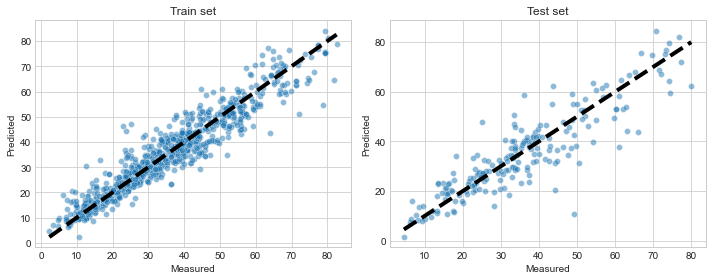

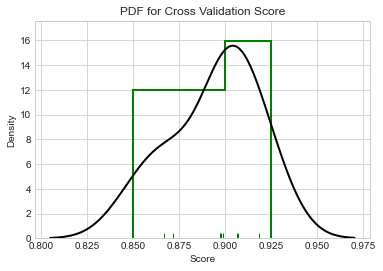

In [64]:
best_alpha = param_dict['alpha']
best_degree = param_dict['degree']
best_gamma = param_dict['gamma']
best_kernel = param_dict['kernel']

print('Kernel:', best_kernel)
print('Best alpha:', best_alpha)
print('Best gamma:', best_gamma)
print('Best degree:', best_degree)
print('')

### Performance based on best parameters for polynomial kernel:
universal_KernelRidge(X_train_scale, y_train, X_test_scale, y_test, alpha = best_alpha, kernel= best_kernel, cv = 10 , degree= best_degree, gamma= best_gamma)

In [67]:
y_train.shape

(824,)

# Observation for Question 3


NOTE: I **split the param search into 3 parts** for the code to run faster and for comparison between the performance of individual kernel with their best parameters possible:
1. Linear
2. Polynomial
3. RBF


### BEST Performance KernelRigde() : RBF Kernel (See below for test results)

For Train set, RBF Kernel always have the best performance after selecting its hyperparameters.
For Test set, either RBF kernel or Polynomial kernel can be the better performing one. 

This shows that if the number of samples in the data set is sufficiently big, RBF kernel tends to generalize slightly better compared to Polynomial and Linear kernel. However, in the case where we have limited samples of data (smaller data set), Polynomial kernel can have the same performance as RBF kernel as well.

Linear kernel have the worst performance comparing to the other two kernel.

**General observation on the parameters of hypermeter tuning:**

1. Linear Regression:
* Cross-validation score: mean = 0.5-0.6 (too low, in general, hyperparameter tuning cannot help to improve the linear regression results much)
* Critical parameter - alpha (regularization strength):
    * alpha too low = No regularization = can have slightly poorer performance such as lower accuracy and larger RMSE comapred to one with some value of regularization
    * alpha too high = Over regularization (performance will degrade)<br>
    <br>
2. Polynimial Regression:
* Cross-validation score: mean = ~0.85 (considered pretty good)
* Critical parameter - degree of poly:
    * degree = 1 (underfit or similar to linear regression) 
    * degree too high = overfitting (generalized well to training set only, perform badly on test set/ unseen data)<br>
<br>
3. RBF Regression need to scale features to prevent the features with the largest range to completely dominate in the computation of the kernel matrix. <br>
<br>
4. RBF Regression:
* Cross-validation score: mean = ~0.90 (best performance out of the 3 kernels)
* Critical parameter - gamma (decides that how much curvature we want in a decision boundary):
    * High Gamma value – More curvature (only near points are considered)
    * Low Gamma value – Less curvature (far away points are also considered)

### Performance of each KernalRidge() model after hyperparameter tuning (random_state = 43)

#### 1. KernalRidge(): Linear kernel

##### Hyperparameter found using GridSearchCV

* Best Parameters : 
        
        {'alpha': 0.003, 'coef0': 1, 'degree': 3, 'gamma': 'None', 'kernel': 'linear', 'kernel_params': None}

* Performance/ Results/ Score:

        Mean CV accuracy: 0.5961093620804652 < ------------------- Very poor accuracy ------------------- >
        Standard Deviation CV accuracy: 0.08597458651194011
        Train accuracy: 0.6139267329479796
        Test accuracy: 0.6058619136785588
        r2_score: 0.36992 
        mean_absolute_error: 8.26186 
        mean_squared_error: 106.92229

        Scaled RMSE: 
         0.2654406101272436 (Train)     
         0.2515607431118394 (Test)



#### 2. KernalRidge(): Polynomial kernel

##### Hyperparameter found using GridSearchCV

* Best Parameters : 

        {'alpha': 0.001, 'coef0': 1, 'degree': 3, 'gamma': 0.04, 'kernel': 'polynomial', 'kernel_params': None}

* Performance/ Results/ Score:

        Mean CV accuracy: 0.8527527759383696  < ------------------- Good accuracy ------------------- >
        Standard Deviation CV accuracy: 0.03138586724625144
        Train accuracy: 0.9214912776474835
        Test accuracy: 0.7757992297445756
        r2_score: 0.916 
        mean_absolute_error: 3.62156 
        mean_squared_error: 21.74285

        Scaled RMSE: 
         0.1196992574894514 (Train)     
         0.1897305288759266 (Test)



#### 3. KernalRidge(): RBF kernel --- *' BEST '*  KernelRidge Model (with below parameters setting)

##### Hyperparameter found using GridSearchCV

* Best Parameters : 
        
        {'alpha': 0.003, 'coef0': 1, 'degree': 3, 'gamma': 0.06, 'kernel': 'rbf', 'kernel_params': None}


* Performance/ Results/ Score:

        Mean CV accuracy: 0.8944284359692448  < ---------------- Best accuracy out of the 3 kernels---------------- >
        Standard Deviation CV accuracy: 0.02352104659044595
        Train accuracy: 0.9550759837506945
        Test accuracy: 0.8357962571796687
        r2_score: 0.95176 
        mean_absolute_error: 2.60219 
        mean_squared_error: 12.44162

        Scaled RMSE: 
         0.09054652537611499 (Train)     
         0.1623716459866898 (Test)



In [65]:
elapsed = timeit.default_timer() - start_time
elapsed

89.3737391